In [1]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import random_unitary
from qiskit.visualization import array_to_latex, plot_histogram

Symulatory - Aer


In [2]:
# Wyświetlenie dostępnych backendów do symulacji:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Unitary Simulator

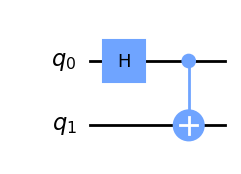

In [3]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw('mpl')

In [4]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_simulator_result = unitary_simulator.run(circuit).result()
unitary_simulator_result.data()

{'unitary': Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
             0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
           [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
           [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
           [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
             0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
          input_dims=(2, 2), output_dims=(2, 2))}

The result is an Operator. It can be printed nicely like this:

In [5]:
array_to_latex(unitary_simulator_result.get_unitary())

<IPython.core.display.Latex object>

In [6]:
circuit = QuantumCircuit(2)
circuit.set_unitary(random_unitary(4))
circuit.h(0)
circuit.cx(0, 1)
unitary_simulator_result = unitary_simulator.run(circuit).result()
unitary_simulator_result.get_unitary()

Operator([[-0.40880112-0.44009765j,  0.37144975+0.01735283j,
           -0.21466294+0.22596373j,  0.03675385+0.63437294j],
          [-0.60412499-0.24950782j, -0.00658816-0.13598563j,
           -0.05776021+0.15065489j, -0.40320902-0.6046757j ],
          [-0.21334902-0.10509532j, -0.70599333-0.21638357j,
           -0.4528115 -0.38203253j,  0.11361988+0.18518139j],
          [ 0.03234778-0.39289355j, -0.5387879 +0.08745073j,
            0.62767221+0.36313572j,  0.00347091+0.144209j  ]],
         input_dims=(2, 2), output_dims=(2, 2))

Statevector Simulator

In [7]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

statevector_simulator = Aer.get_backend('statevector_simulator')
statevector_simulator_result = statevector_simulator.run(circuit).result()
statevector_simulator_result.data()

{'statevector': Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.70710678+0.j],
             dims=(2, 2))}

The result is a Statevector. It can be printed nicely like this:

In [8]:
array_to_latex(statevector_simulator_result.get_statevector())

<IPython.core.display.Latex object>

It can be useful, for example, to make snapshots during different points of the execution:

In [9]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.save_statevector('breakpoint')
circuit.cx(0, 1)

statevector_simulator = Aer.get_backend('statevector_simulator')
statevector_simulator_result = statevector_simulator.run(circuit).result()
array_to_latex(statevector_simulator_result.data()['breakpoint'])

<IPython.core.display.Latex object>

QASM Simulator
Needs measurments, as it simulates an idea (without noise, by default) quantum hardware.

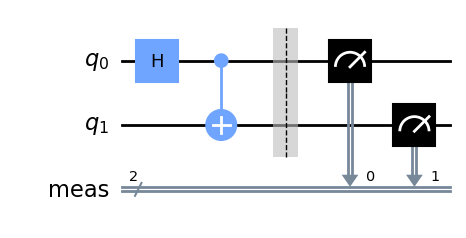

In [10]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()  # <--
circuit.draw('mpl')

In [11]:
qasm_simulator = Aer.get_backend('qasm_simulator')
qasm_simulator_result = qasm_simulator.run(circuit).result()
qasm_simulator_result.data()

{'counts': {'0x0': 517, '0x3': 507}}

The result is a Python dict. It can be printed nicely like this:

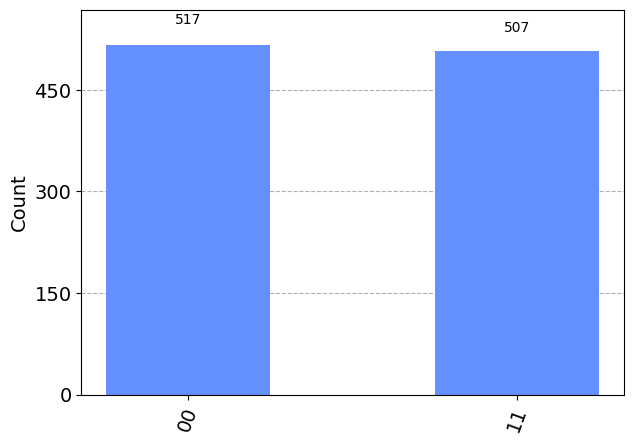

In [12]:
plot_histogram(qasm_simulator_result.get_counts())

With this simulator, you can simulate a executions in shots and get the value of each of them:

In [13]:
memory_result = qasm_simulator.run(circuit, shots=10, memory=True).result()
memory_result.get_memory(circuit)

['11', '00', '00', '00', '00', '11', '00', '11', '00', '00']